# OpenWeatherMap (OWM) Visualization

This code imports essential libraries for data manipulation, visualization, and displaying results (pandas, matplotlib, seaborn, IPython.display), along with cassandrautils for interacting with Cassandra databases.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from cassandrautils import *


This code retrieves weather data, processes forecast timestamps, displays the data range, and shows the first 20 rows in a formatted table.

In [2]:
def display_table(dataframe, rows=10):
    from IPython.display import display
    display(dataframe.head(rows))


weather_df = getWeatherDF()
weather_df['forecast_timestamp'] = pd.to_datetime(weather_df['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather from ", weather_df['forecast_timestamp'].min(), " To ", weather_df['forecast_timestamp'].max())
display_table(weather_df, rows=20)


Weather from  2024-11-27 15:43:22  To  2024-11-27 15:54:54


,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,New York,2024-11-27 15:43:22,clear sky,278.760010,54.0,1017.0,1732708633,1732743050,281.769989,283.049988,280.779999,5.66,2024-11-27 15:43:22
1,New York,2024-11-27 15:44:25,clear sky,278.760010,54.0,1017.0,1732708633,1732743050,281.769989,283.049988,280.779999,5.66,2024-11-27 15:44:25
2,New York,2024-11-27 15:45:27,clear sky,278.760010,54.0,1017.0,1732708633,1732743050,281.769989,283.049988,280.779999,5.66,2024-11-27 15:45:27
3,New York,2024-11-27 15:46:30,clear sky,278.760010,54.0,1017.0,1732708633,1732743050,281.769989,283.049988,280.779999,5.66,2024-11-27 15:46:30
4,New York,2024-11-27 15:47:33,clear sky,278.989990,53.0,1017.0,1732708633,1732743050,281.950012,283.160004,280.779999,5.66,2024-11-27 15:47:33
5,New York,2024-11-27 15:48:36,clear sky,278.989990,53.0,1017.0,1732708633,1732743050,281.950012,283.160004,280.779999,5.66,2024-11-27 15:48:36
6,New York,2024-11-27 15:49:39,clear sky,278.989990,53.0,1017.0,1732708633,1732743050,281.950012,283.160004,280.779999,5.66,2024-11-27 15:49:39
7,New York,2024-11-27 15:50:42,clear sky,278.989990,53.0,1017.0,1732708633,1732743050,281.950012,283.160004,280.779999,5.66,2024-11-27 15:50:42
8,New York,2024-11-27 15:51:45,clear sky,278.989990,53.0,1017.0,1732708633,1732743050,281.950012,283.160004,280.779999,5.66,2024-11-27 15:51:45
9,New York,2024-11-27 15:52:48,clear sky,278.750000,54.0,1017.0,1732708633,1732743050,281.760010,283.049988,280.779999,5.66,2024-11-27 15:52:48


This function converts temperature values in a weather DataFrame from Kelvin to Celsius for columns temp, temp_min, and temp_max, if they exist, and returns the modified DataFrame.

In [3]:
def convert_kelvin_to_celsius(weather_df):
    temp_df = weather_df.copy()
    for col in ['temp', 'temp_min', 'temp_max']:
        if col in temp_df.columns:
            temp_df[col] = temp_df[col] - 273.15
    return temp_df


This function plots temperature trends over time for multiple cities, displaying average, minimum, and maximum temperatures (converted from Kelvin to Celsius) with distinct colors and line styles for each city and temperature type.

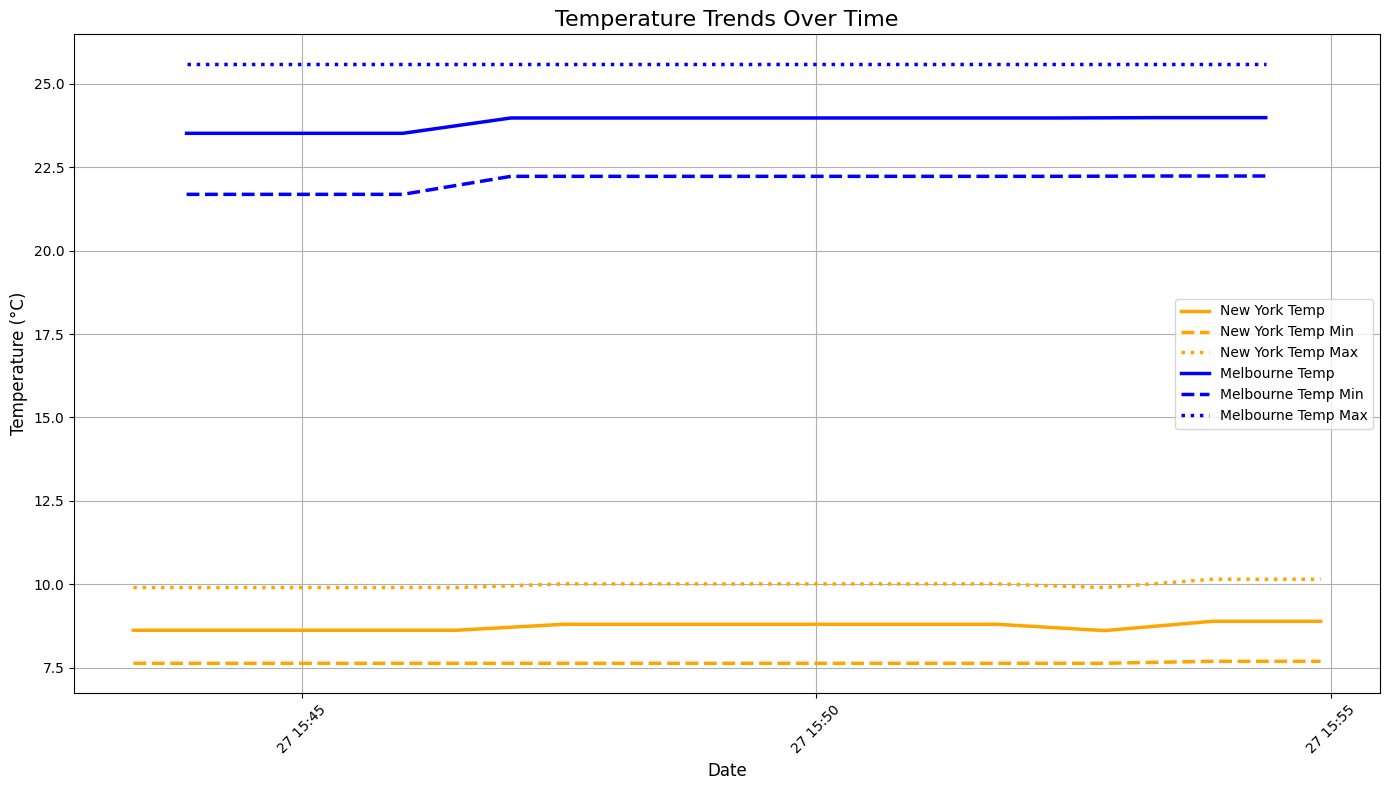

In [4]:
def plot_temperature_trends(weather_df):
    temp_df = convert_kelvin_to_celsius(weather_df)
    temp_df = temp_df.sort_values(by='forecast_timestamp')

    plt.figure(figsize=(14, 8))

    city_colors = {'Melbourne': 'blue', 'New York': 'orange'}
    line_styles = {'temp': '-', 'temp_min': '--', 'temp_max': ':'}

    for location in temp_df['location'].unique():
        city_data = temp_df[temp_df['location'] == location]
        for col, style in line_styles.items():
            if col in city_data.columns:
                plt.plot(city_data['forecast_timestamp'], city_data[col], 
                         label=f'{location} {col.replace("_", " ").title()}', 
                         color=city_colors.get(location, 'black'), 
                         linestyle=style, linewidth=2.5)

    plt.title("Temperature Trends Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Temperature (°C)", fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_temperature_trends(weather_df)


This function visualizes the average temperature comparison between cities by converting temperatures from Kelvin to Celsius, calculating the mean temperature for each city, and displaying the results as a bar chart.

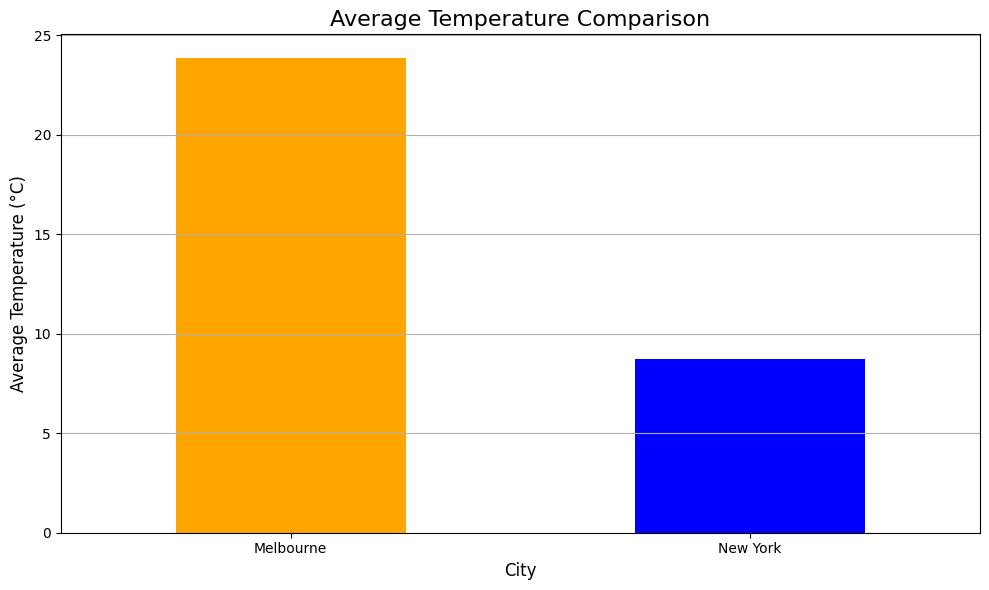

In [7]:
def plot_avg_temperature_comparison(weather_df):
    weather_df = convert_kelvin_to_celsius(weather_df)
    avg_temp = weather_df.groupby('location')['temp'].mean()

    plt.figure(figsize=(10, 6))
    avg_temp.plot(kind='bar', color=['orange', 'blue'], width=0.5)

    plt.title("Average Temperature Comparison", fontsize=16)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Average Temperature (°C)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_avg_temperature_comparison(weather_df)


This function compares temperature statistics between two cities in a weather dataset, analyzing their average temperatures, ranges, fluctuations, and overlapping temperature conditions, and generates a detailed textual summary of the findings.

In [8]:
def compare_two_cities_temperature(weather_df):
    temp_df = convert_kelvin_to_celsius(weather_df)
    temp_df = temp_df.sort_values(by='forecast_timestamp')
    
    # Get the two cities
    cities = temp_df['location'].unique()
    if len(cities) != 2:
        return "The dataset must contain exactly two cities for this analysis."
    
    city1, city2 = cities
    city1_data = temp_df[temp_df['location'] == city1]
    city2_data = temp_df[temp_df['location'] == city2]
    
    # Calculate statistics
    city1_stats = {
        'avg_temp': city1_data['temp'].mean(),
        'min_temp': city1_data['temp_min'].min(),
        'max_temp': city1_data['temp_max'].max()
    }
    city2_stats = {
        'avg_temp': city2_data['temp'].mean(),
        'min_temp': city2_data['temp_min'].min(),
        'max_temp': city2_data['temp_max'].max()
    }
    
    # Compare fluctuations
    city1_fluctuation = city1_stats['max_temp'] - city1_stats['min_temp']
    city2_fluctuation = city2_stats['max_temp'] - city2_stats['min_temp']
    
    # Analyze overlapping ranges
    overlap = (
        city1_stats['min_temp'] <= city2_stats['max_temp'] and 
        city2_stats['min_temp'] <= city1_stats['max_temp']
    )
    
    # Generate the analysis
    analysis = f"Temperature Comparison Between {city1} and {city2}:\n\n"
    analysis += f"{city1}:\n"
    analysis += (
        f" - Average Temperature: {city1_stats['avg_temp']:.1f}°C\n"
        f" - Temperature Range: {city1_stats['min_temp']:.1f}°C to {city1_stats['max_temp']:.1f}°C\n"
        f" - Fluctuation: {city1_fluctuation:.1f}°C\n\n"
    )
    analysis += f"{city2}:\n"
    analysis += (
        f" - Average Temperature: {city2_stats['avg_temp']:.1f}°C\n"
        f" - Temperature Range: {city2_stats['min_temp']:.1f}°C to {city2_stats['max_temp']:.1f}°C\n"
        f" - Fluctuation: {city2_fluctuation:.1f}°C\n\n"
    )
    
    # Overall comparison
    analysis += "Key Observations:\n"
    if city1_stats['avg_temp'] > city2_stats['avg_temp']:
        analysis += f" - {city1} is warmer on average ({city1_stats['avg_temp']:.1f}°C) compared to {city2} ({city2_stats['avg_temp']:.1f}°C).\n"
    else:
        analysis += f" - {city2} is warmer on average ({city2_stats['avg_temp']:.1f}°C) compared to {city1} ({city1_stats['avg_temp']:.1f}°C).\n"
    
    if city1_fluctuation > city2_fluctuation:
        analysis += f" - {city1} shows greater temperature fluctuations ({city1_fluctuation:.1f}°C) than {city2} ({city2_fluctuation:.1f}°C).\n"
    else:
        analysis += f" - {city2} shows greater temperature fluctuations ({city2_fluctuation:.1f}°C) than {city1} ({city1_fluctuation:.1f}°C).\n"
    
    if overlap:
        analysis += f" - The temperature ranges of {city1} and {city2} overlap, suggesting similar conditions at times.\n"
    else:
        analysis += f" - The temperature ranges of {city1} and {city2} do not overlap, indicating distinct conditions.\n"
    
    return analysis


two_city_analysis = compare_two_cities_temperature(weather_df)
print(two_city_analysis)


Temperature Comparison Between New York and Melbourne:

New York:
 - Average Temperature: 8.7°C
 - Temperature Range: 7.6°C to 10.1°C
 - Fluctuation: 2.5°C

Melbourne:
 - Average Temperature: 23.9°C
 - Temperature Range: 21.7°C to 25.6°C
 - Fluctuation: 3.9°C

Key Observations:
 - Melbourne is warmer on average (23.9°C) compared to New York (8.7°C).
 - Melbourne shows greater temperature fluctuations (3.9°C) than New York (2.5°C).
 - The temperature ranges of New York and Melbourne do not overlap, indicating distinct conditions.



This function visualizes humidity trends over time for multiple cities by plotting humidity percentages against forecast timestamps, with distinct lines for each city, enabling a clear comparison of humidity patterns.

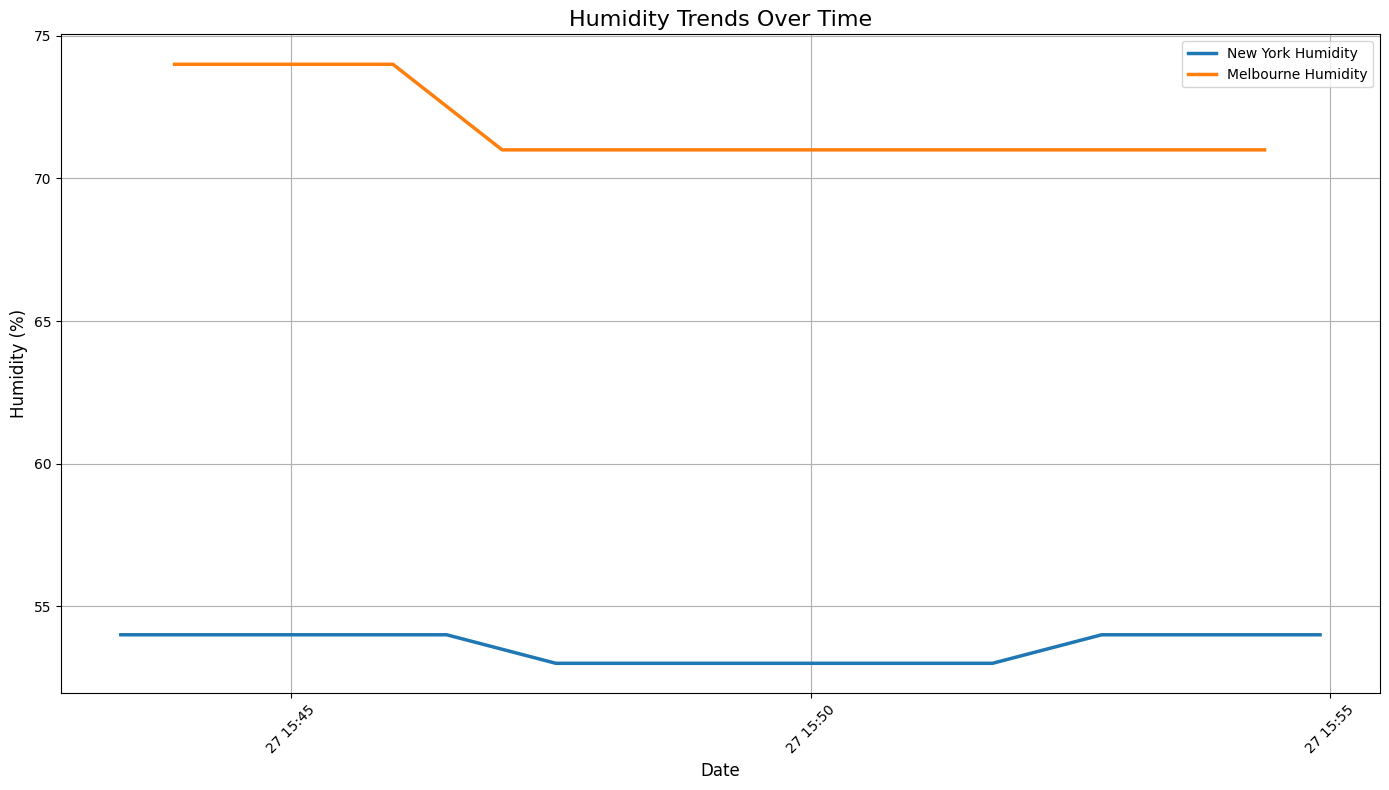

In [9]:
def plot_humidity_trends(weather_df):
    weather_df = weather_df.sort_values(by='forecast_timestamp')

    plt.figure(figsize=(14, 8))
    for location in weather_df['location'].unique():
        city_data = weather_df[weather_df['location'] == location]
        plt.plot(city_data['forecast_timestamp'], city_data['humidity'], label=f'{location} Humidity', linewidth=2.5)

    plt.title("Humidity Trends Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Humidity (%)", fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_humidity_trends(weather_df)


This function analyzes humidity trends for two cities by calculating average, minimum, maximum, and fluctuation statistics for each, comparing their overall and fluctuating humidity levels, checking for overlapping ranges, and generating a detailed textual report of the findings.

In [ ]:
def analyze_humidity_trends_two_cities(weather_df):
    # Ensure data is sorted
    weather_df = weather_df.sort_values(by='forecast_timestamp')

    # Get the two cities
    cities = weather_df['location'].unique()
    if len(cities) != 2:
        return "The dataset must contain exactly two cities for this analysis."

    city1, city2 = cities
    city1_data = weather_df[weather_df['location'] == city1]
    city2_data = weather_df[weather_df['location'] == city2]

    # Calculate statistics for each city
    city1_stats = {
        'avg_humidity': city1_data['humidity'].mean(),
        'min_humidity': city1_data['humidity'].min(),
        'max_humidity': city1_data['humidity'].max(),
        'fluctuation': city1_data['humidity'].max() - city1_data['humidity'].min()
    }
    city2_stats = {
        'avg_humidity': city2_data['humidity'].mean(),
        'min_humidity': city2_data['humidity'].min(),
        'max_humidity': city2_data['humidity'].max(),
        'fluctuation': city2_data['humidity'].max() - city2_data['humidity'].min()
    }

    # Start analysis
    analysis = f"Humidity Trends Analysis Between {city1} and {city2}:\n\n"

    # Individual city insights
    analysis += (
        f"{city1}:\n"
        f" - Average Humidity: {city1_stats['avg_humidity']:.1f}%\n"
        f" - Minimum Humidity: {city1_stats['min_humidity']:.1f}%\n"
        f" - Maximum Humidity: {city1_stats['max_humidity']:.1f}%\n"
        f" - Fluctuation: {city1_stats['fluctuation']:.1f}%\n"
        f"   -> {'Stable' if city1_stats['fluctuation'] < 10 else 'Significant variations in humidity observed.'}\n\n"
        f"{city2}:\n"
        f" - Average Humidity: {city2_stats['avg_humidity']:.1f}%\n"
        f" - Minimum Humidity: {city2_stats['min_humidity']:.1f}%\n"
        f" - Maximum Humidity: {city2_stats['max_humidity']:.1f}%\n"
        f" - Fluctuation: {city2_stats['fluctuation']:.1f}%\n"
        f"   -> {'Stable' if city2_stats['fluctuation'] < 10 else 'Significant variations in humidity observed.'}\n\n"
    )

    # Comparative analysis
    analysis += "Comparison:\n"
    if city1_stats['avg_humidity'] > city2_stats['avg_humidity']:
        analysis += (
            f" - {city1} is more humid on average ({city1_stats['avg_humidity']:.1f}%) "
            f"than {city2} ({city2_stats['avg_humidity']:.1f}%).\n"
        )
    else:
        analysis += (
            f" - {city2} is more humid on average ({city2_stats['avg_humidity']:.1f}%) "
            f"than {city1} ({city1_stats['avg_humidity']:.1f}%).\n"
        )

    if city1_stats['fluctuation'] > city2_stats['fluctuation']:
        analysis += f" - {city1} shows greater humidity fluctuation ({city1_stats['fluctuation']:.1f}%) than {city2}.\n"
    else:
        analysis += f" - {city2} shows greater humidity fluctuation ({city2_stats['fluctuation']:.1f}%) than {city1}.\n"

    # Overlapping ranges
    if city1_stats['min_humidity'] <= city2_stats['max_humidity'] and city2_stats['min_humidity'] <= city1_stats['max_humidity']:
        analysis += f" - The humidity ranges of {city1} and {city2} overlap, indicating similar conditions at times.\n"
    else:
        analysis += f" - The humidity ranges of {city1} and {city2} do not overlap, suggesting distinct conditions.\n"

    return analysis


humidity_analysis_two_cities = analyze_humidity_trends_two_cities(weather_df)
print(humidity_analysis_two_cities)


Humidity Trends Analysis Between New York and Melbourne:

New York:
 - Average Humidity: 53.6%
 - Minimum Humidity: 53.0%
 - Maximum Humidity: 54.0%
 - Fluctuation: 1.0%
   -> Stable

Melbourne:
 - Average Humidity: 71.8%
 - Minimum Humidity: 71.0%
 - Maximum Humidity: 74.0%
 - Fluctuation: 3.0%
   -> Stable

Comparison:
 - Melbourne is more humid on average (71.8%) than New York (53.6%).
 - Melbourne shows greater humidity fluctuation (3.0%) than New York.
 - The humidity ranges of New York and Melbourne do not overlap, suggesting distinct conditions.



This function visualizes the wind speed distribution for multiple cities by plotting overlaid histograms of wind speeds, with separate colors and labels for each city, allowing comparison of their wind speed frequencies.

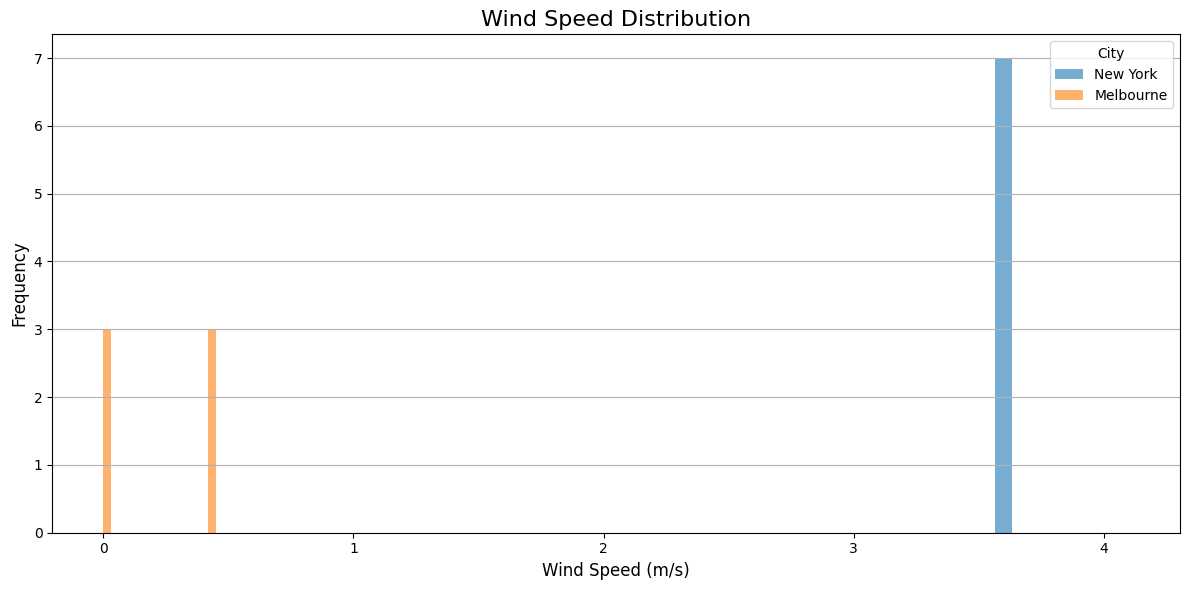

In [7]:
def plot_wind_speed_distribution(weather_df):
    plt.figure(figsize=(12, 6))
    for location in weather_df['location'].unique():
        city_data = weather_df[weather_df['location'] == location]
        plt.hist(city_data['wind'], bins=15, alpha=0.6, label=location)

    plt.title("Wind Speed Distribution", fontsize=16)
    plt.xlabel("Wind Speed (m/s)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title="City")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_wind_speed_distribution(weather_df)


This function analyzes the wind speed distribution for multiple cities by calculating average, minimum, maximum, and standard deviation values for each city, identifying variability, comparing average wind speeds between cities, and checking for overlapping wind speed ranges, then generates a detailed report of findings.

In [ ]:
def analyze_wind_speed_distribution_two_cities(weather_df):
    # Ensure there are exactly two cities
    cities = weather_df['location'].unique()
    if len(cities) != 2:
        return "The dataset must contain exactly two cities for this analysis."
    
    # Extract the two cities
    city1, city2 = cities
    city1_data = weather_df[weather_df['location'] == city1]
    city2_data = weather_df[weather_df['location'] == city2]
    
    # Calculate statistics for each city
    city1_stats = {
        'avg_wind': city1_data['wind'].mean(),
        'min_wind': city1_data['wind'].min(),
        'max_wind': city1_data['wind'].max(),
        'std_dev': city1_data['wind'].std()
    }
    city2_stats = {
        'avg_wind': city2_data['wind'].mean(),
        'min_wind': city2_data['wind'].min(),
        'max_wind': city2_data['wind'].max(),
        'std_dev': city2_data['wind'].std()
    }
    
    # Generate the analysis report
    analysis = f"Wind Speed Distribution Analysis Between {city1} and {city2}:\n\n"
    
    # Individual city analysis
    analysis += f"{city1}:\n"
    analysis += (
        f" - Average Wind Speed: {city1_stats['avg_wind']:.1f} m/s\n"
        f" - Minimum Wind Speed: {city1_stats['min_wind']:.1f} m/s\n"
        f" - Maximum Wind Speed: {city1_stats['max_wind']:.1f} m/s\n"
        f" - Standard Deviation: {city1_stats['std_dev']:.1f} m/s\n"
        f"   -> {'Relatively consistent' if city1_stats['std_dev'] < 2 else 'Significant variation'} in wind speeds.\n\n"
    )
    
    analysis += f"{city2}:\n"
    analysis += (
        f" - Average Wind Speed: {city2_stats['avg_wind']:.1f} m/s\n"
        f" - Minimum Wind Speed: {city2_stats['min_wind']:.1f} m/s\n"
        f" - Maximum Wind Speed: {city2_stats['max_wind']:.1f} m/s\n"
        f" - Standard Deviation: {city2_stats['std_dev']:.1f} m/s\n"
        f"   -> {'Relatively consistent' if city2_stats['std_dev'] < 2 else 'Significant variation'} in wind speeds.\n\n"
    )
    
    # Comparison between the two cities
    analysis += "Comparison:\n"
    if city1_stats['avg_wind'] > city2_stats['avg_wind']:
        analysis += f" - {city1} has a higher average wind speed ({city1_stats['avg_wind']:.1f} m/s) compared to {city2} ({city2_stats['avg_wind']:.1f} m/s).\n"
    else:
        analysis += f" - {city2} has a higher average wind speed ({city2_stats['avg_wind']:.1f} m/s) compared to {city1} ({city1_stats['avg_wind']:.1f} m/s).\n"
    
    # Overlapping ranges
    if city1_stats['min_wind'] <= city2_stats['max_wind'] and city2_stats['min_wind'] <= city1_stats['max_wind']:
        analysis += " - The wind speed ranges of both cities overlap, indicating similar conditions at times.\n"
    else:
        analysis += " - The wind speed ranges of the two cities do not overlap, indicating distinct wind conditions.\n"
    
    return analysis


wind_speed_analysis = analyze_wind_speed_distribution_two_cities(weather_df)
print(wind_speed_analysis)


Wind Speed Distribution Analysis:

New York:
 - Average Wind Speed: 5.5 m/s
 - Minimum Wind Speed: 4.6 m/s
 - Maximum Wind Speed: 5.7 m/s
 - Standard Deviation: 0.4 m/s
   -> Wind speeds are relatively consistent.

Melbourne:
 - Average Wind Speed: 1.3 m/s
 - Minimum Wind Speed: 0.4 m/s
 - Maximum Wind Speed: 1.8 m/s
 - Standard Deviation: 0.6 m/s
   -> Wind speeds are relatively consistent.

Comparison Between Cities:
 - City with Highest Average Wind Speed: New York (5.5 m/s).
 - City with Lowest Average Wind Speed: Melbourne (1.3 m/s).
 - No overlapping wind speed ranges detected between cities.



This function visualizes the relationship between temperature and humidity for multiple cities by plotting scatter plots for each city's data, using distinct labels and colors to enable comparison of temperature and humidity patterns.

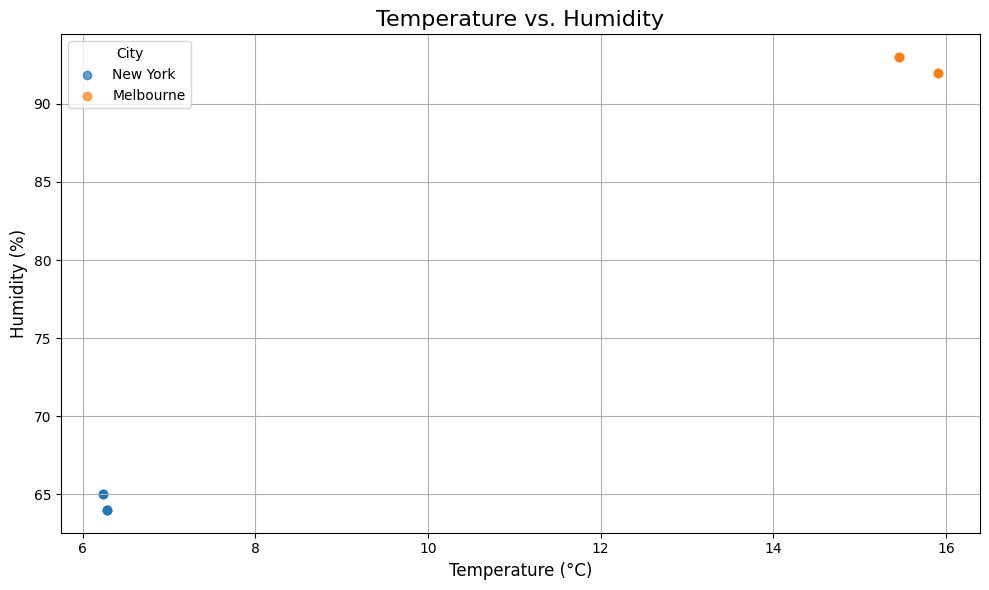

In [8]:
def plot_temp_vs_humidity(weather_df):
    weather_df = convert_kelvin_to_celsius(weather_df)

    plt.figure(figsize=(10, 6))
    for location in weather_df['location'].unique():
        city_data = weather_df[weather_df['location'] == location]
        plt.scatter(city_data['temp'], city_data['humidity'], label=location, alpha=0.7)

    plt.title("Temperature vs. Humidity", fontsize=16)
    plt.xlabel("Temperature (°C)", fontsize=12)
    plt.ylabel("Humidity (%)", fontsize=12)
    plt.legend(title="City")
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_temp_vs_humidity(weather_df)


This function analyzes the relationship between temperature and humidity for multiple cities by calculating correlations, summarizing maximum values, comparing average temperature and humidity across cities, and identifying the cities with the highest average temperature and humidity.

In [ ]:
def analyze_temp_vs_humidity_two_cities(weather_df):
    # Convert temperature from Kelvin to Celsius
    temp_df = convert_kelvin_to_celsius(weather_df)

    # Ensure there are exactly two cities
    cities = temp_df['location'].unique()
    if len(cities) != 2:
        return "The dataset must contain exactly two cities for this analysis."

    city1, city2 = cities
    city1_data = temp_df[temp_df['location'] == city1]
    city2_data = temp_df[temp_df['location'] == city2]

    # Calculate statistics for each city
    city1_stats = {
        'avg_temp': city1_data['temp'].mean(),
        'avg_humidity': city1_data['humidity'].mean(),
        'correlation': np.corrcoef(city1_data['temp'], city1_data['humidity'])[0, 1],
        'max_temp': city1_data['temp'].max(),
        'max_humidity': city1_data['humidity'].max()
    }
    city2_stats = {
        'avg_temp': city2_data['temp'].mean(),
        'avg_humidity': city2_data['humidity'].mean(),
        'correlation': np.corrcoef(city2_data['temp'], city2_data['humidity'])[0, 1],
        'max_temp': city2_data['temp'].max(),
        'max_humidity': city2_data['humidity'].max()
    }

    # Generate the analysis report
    analysis = f"Temperature vs. Humidity Analysis Between {city1} and {city2}:\n\n"

    # City-specific insights
    for city, stats in zip([city1, city2], [city1_stats, city2_stats]):
        trend = (
            "positive" if stats['correlation'] > 0.5 else
            "negative" if stats['correlation'] < -0.5 else
            "weak or no"
        )
        analysis += (
            f"{city}:\n"
            f" - Average Temperature: {stats['avg_temp']:.1f}°C\n"
            f" - Average Humidity: {stats['avg_humidity']:.1f}%\n"
            f" - Correlation between Temperature and Humidity: {stats['correlation']:.2f}\n"
            f"   -> This indicates a {trend} relationship.\n"
            f" - Maximum Temperature: {stats['max_temp']:.1f}°C\n"
            f" - Maximum Humidity: {stats['max_humidity']:.1f}%\n\n"
        )

    # Comparison between the two cities
    analysis += "Comparison Between Cities:\n"
    if city1_stats['avg_temp'] > city2_stats['avg_temp']:
        analysis += f" - {city1} is warmer on average ({city1_stats['avg_temp']:.1f}°C) compared to {city2} ({city2_stats['avg_temp']:.1f}°C).\n"
    else:
        analysis += f" - {city2} is warmer on average ({city2_stats['avg_temp']:.1f}°C) compared to {city1} ({city1_stats['avg_temp']:.1f}°C).\n"

    if city1_stats['avg_humidity'] > city2_stats['avg_humidity']:
        analysis += f" - {city1} is more humid on average ({city1_stats['avg_humidity']:.1f}%) compared to {city2} ({city2_stats['avg_humidity']:.1f}%).\n"
    else:
        analysis += f" - {city2} is more humid on average ({city2_stats['avg_humidity']:.1f}%) compared to {city1} ({city1_stats['avg_humidity']:.1f}%).\n"

    return analysis


temp_humidity_analysis_two_cities = analyze_temp_vs_humidity_two_cities(weather_df)
print(temp_humidity_analysis_two_cities)


Temperature vs. Humidity Analysis:

New York:
 - Correlation between Temperature and Humidity: -0.48
   -> This indicates a weak or no relationship between temperature and humidity.
 - Maximum Temperature: 8.9°C
 - Maximum Humidity: 54.0%

Melbourne:
 - Correlation between Temperature and Humidity: -1.00
   -> This indicates a negative relationship between temperature and humidity.
 - Maximum Temperature: 24.0°C
 - Maximum Humidity: 74.0%

Comparison Between Cities:
 - New York: Average Temperature = 8.7°C, Average Humidity = 53.6%.
 - Melbourne: Average Temperature = 23.9°C, Average Humidity = 71.8%.

 - Melbourne has the highest average temperature.
 - Melbourne has the highest average humidity.

